# Data Science and Business Analytics Tasks
  
  

# Exploratory Data Analysis-Sports

 **Priyakant Tanaji Jadhav

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [37]:
deliveries=pd.read_csv("E:/IPL/deliveries.csv")

In [38]:
matches=pd.read_csv("E:/IPL/matches.csv")

In [39]:
deliveries.head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [40]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [41]:
print(deliveries.shape,matches.shape)

(179078, 21) (756, 18)


In [42]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [43]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# Cleaning all null values from city column in matches dataset

In [44]:
matches[matches["city"].isna()]


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [45]:
matches.loc[matches["city"].isna(),'city']='Dubai'


# Cleaning null values for winner column in matches dataset

In [46]:
matches[matches["winner"].isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [47]:
matches.loc[matches["winner"].isna(),'winner']='No winner'
matches.loc[matches["player_of_match"].isna(),"player_of_match"]="No player_of_match "

In [48]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  756 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [49]:
matches.drop("umpire1",axis=1,inplace=True)
matches.drop("umpire2",axis=1,inplace=True)
matches.drop("umpire3",axis=1,inplace=True)

In [50]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  756 non-null    object
 14  venue            756 non-null    object
dtypes: int64(5), object(10)
memory usage: 88.7+ KB


In [51]:
matches.replace(to_replace='Rising Pune supergiant',value='Rising Pune supergiants',inplace=True)
deliveries.replace(to_replace='Rising Pune Supergiant',value='Rising Pune Supergiants',inplace=True)

In [52]:
matches.replace(to_replace='Delhi Capitals',value='Delhi Daredevils',inplace=True)
deliveries.replace(to_replace='Delhi Capitals',value='Delhi Daredevils',inplace=True)

# Total number of matches in every season

[Text(0.5, 1.0, 'Total no of matches played in each seasons')]

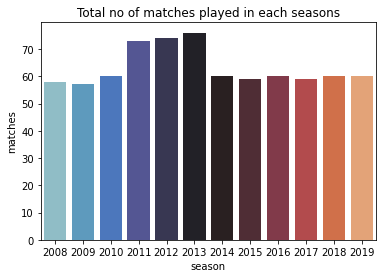

In [53]:
total_matches=matches["season"].value_counts().reset_index()
total_matches.columns=["season","matches"]
sns.barplot(x='season',y="matches",data=total_matches,palette='icefire').set(title="Total no of matches played in each seasons")

# Matches played and won by each team

In [54]:
matches_played=pd.concat([matches["team1"],matches["team2"]],axis=0)
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=["Team","Total matches played"]
matches_played["winner"]=matches["winner"].value_counts().reset_index()["winner"]
matches_played["winning_percentage"]=matches_played["winner"] / matches_played["Total matches played"]
matches_played

,Team,Total matches played,winner,winning_percentage
0,Mumbai Indians,187,109,0.582888
1,Royal Challengers Bangalore,180,100,0.555556
2,Kolkata Knight Riders,178,92,0.516854
3,Delhi Daredevils,177,84,0.474576
4,Kings XI Punjab,176,82,0.465909
5,Chennai Super Kings,164,77,0.469512
6,Rajasthan Royals,147,75,0.510204
7,Sunrisers Hyderabad,108,58,0.537037
8,Deccan Chargers,75,29,0.386667
9,Pune Warriors,46,13,0.282609


[Text(0, 0, 'Mumbai Indians'),
 Text(1, 0, 'Royal Challengers Bangalore'),
 Text(2, 0, 'Kolkata Knight Riders'),
 Text(3, 0, 'Delhi Daredevils'),
 Text(4, 0, 'Kings XI Punjab'),
 Text(5, 0, 'Chennai Super Kings'),
 Text(6, 0, 'Rajasthan Royals'),
 Text(7, 0, 'Sunrisers Hyderabad'),
 Text(8, 0, 'Deccan Chargers'),
 Text(9, 0, 'Pune Warriors'),
 Text(10, 0, 'Gujarat Lions'),
 Text(11, 0, 'Rising Pune Supergiant'),
 Text(12, 0, 'Rising Pune Supergiants'),
 Text(13, 0, 'Kochi Tuskers Kerala')]

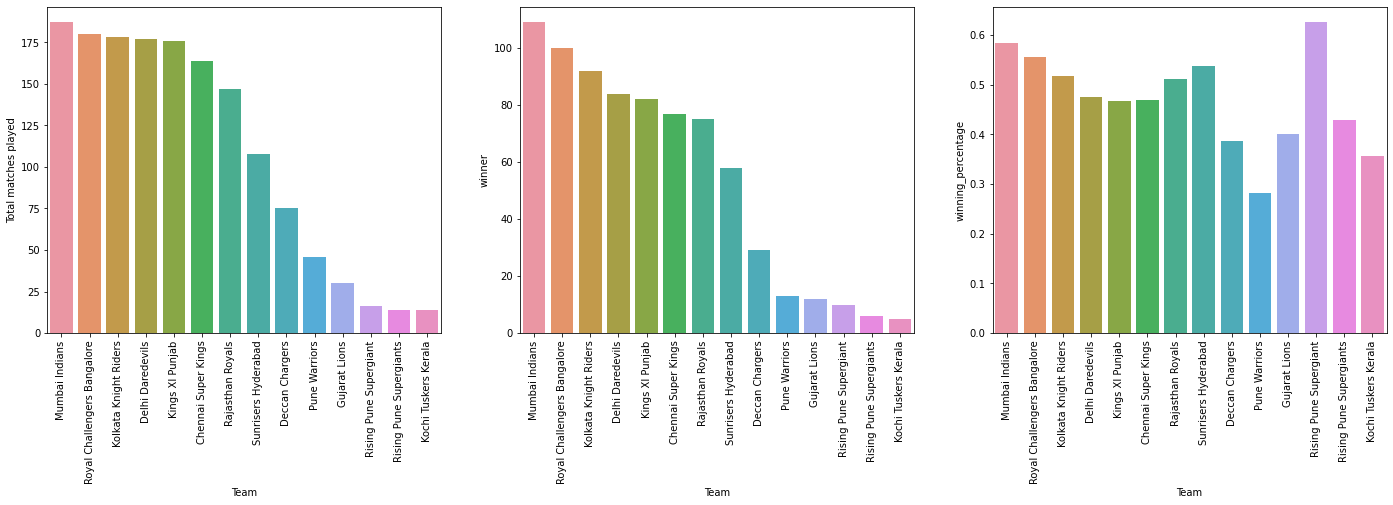

In [55]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(24,6))
sns.barplot(x='Team',y='Total matches played',data=matches_played,ax=axes[0]).set_xticklabels(matches_played["Team"],rotation=90)
sns.barplot(x='Team',y='winner',data=matches_played,ax=axes[1]).set_xticklabels(matches_played["Team"],rotation=90)
sns.barplot(x='Team',y='winning_percentage',data=matches_played,ax=axes[2]).set_xticklabels(matches_played["Team"],rotation=90)

[Text(0, 0, 'Mumbai'),
 Text(1, 0, 'Kolkata'),
 Text(2, 0, 'Delhi'),
 Text(3, 0, 'Bangalore'),
 Text(4, 0, 'Hyderabad'),
 Text(5, 0, 'Chennai'),
 Text(6, 0, 'Jaipur'),
 Text(7, 0, 'Chandigarh'),
 Text(8, 0, 'Pune'),
 Text(9, 0, 'Durban'),
 Text(10, 0, 'Bengaluru'),
 Text(11, 0, 'Visakhapatnam'),
 Text(12, 0, 'Centurion'),
 Text(13, 0, 'Ahmedabad'),
 Text(14, 0, 'Rajkot'),
 Text(15, 0, 'Mohali'),
 Text(16, 0, 'Indore'),
 Text(17, 0, 'Dharamsala'),
 Text(18, 0, 'Johannesburg'),
 Text(19, 0, 'Abu Dhabi'),
 Text(20, 0, 'Cuttack'),
 Text(21, 0, 'Cape Town'),
 Text(22, 0, 'Dubai'),
 Text(23, 0, 'Ranchi'),
 Text(24, 0, 'Port Elizabeth'),
 Text(25, 0, 'Sharjah'),
 Text(26, 0, 'Raipur'),
 Text(27, 0, 'Kochi'),
 Text(28, 0, 'Kanpur'),
 Text(29, 0, 'Nagpur'),
 Text(30, 0, 'East London'),
 Text(31, 0, 'Kimberley'),
 Text(32, 0, 'Bloemfontein')]

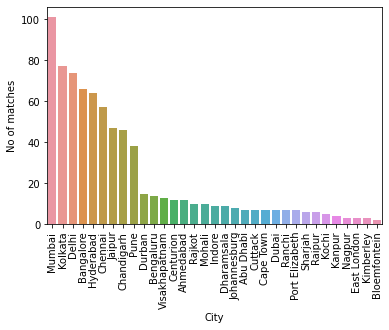

In [56]:
matches_city=matches['city'].value_counts().reset_index().sort_values(by='city',ascending=False)
matches_city.columns=['City','No of matches']
sns.barplot(x='City',y='No of matches',data=matches_city).set_xticklabels(matches_city["City"],rotation=90)

In [57]:
runs=matches.merge(deliveries,left_on='id',right_on='match_id',how='left').drop('id',axis=1)
total_runs_season=runs.groupby(['season'])['total_runs'].sum().reset_index()
matches_season=matches.groupby(['season']).count()["id"].reset_index()
matches_season.rename(columns={'id':'matches'},inplace=True)
matches_season["total_runs"]=total_runs_season["total_runs"]
matches_season["average_runs_per_match"] = matches_season['total_runs'] / matches_season['matches']
matches_season

,season,matches,total_runs,average_runs_per_match
0,2008,58,17937,309.258621
1,2009,57,16353,286.894737
2,2010,60,18883,314.716667
3,2011,73,21154,289.780822
4,2012,74,22453,303.418919
5,2013,76,22602,297.394737
6,2014,60,18931,315.516667
7,2015,59,18353,311.067797
8,2016,60,18862,314.366667
9,2017,59,18786,318.406780


# Total and average runs per season

[Text(0, 0, '2008'),
 Text(1, 0, '2009'),
 Text(2, 0, '2010'),
 Text(3, 0, '2011'),
 Text(4, 0, '2012'),
 Text(5, 0, '2013'),
 Text(6, 0, '2014'),
 Text(7, 0, '2015'),
 Text(8, 0, '2016'),
 Text(9, 0, '2017'),
 Text(10, 0, '2018'),
 Text(11, 0, '2019')]

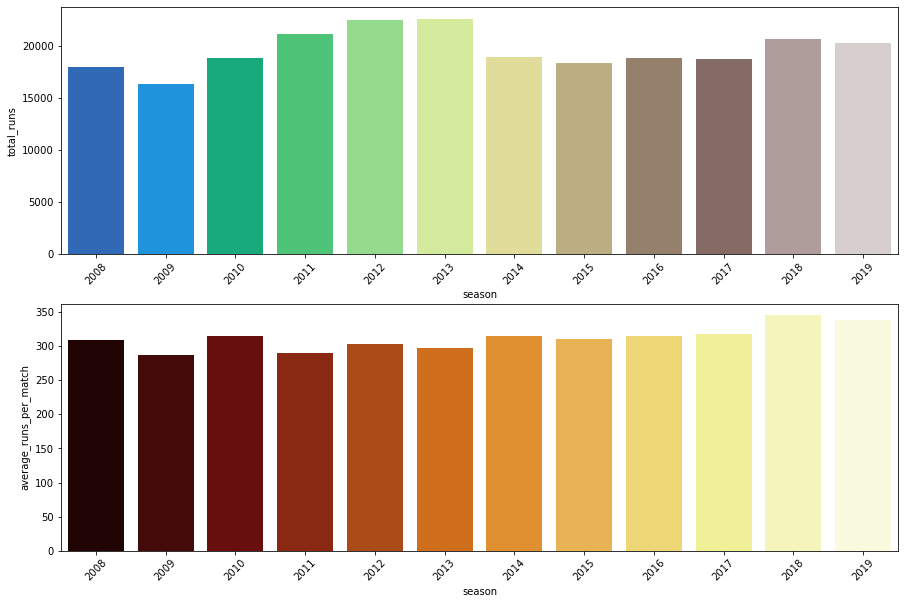

In [58]:
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(15,10))
sns.barplot(x='season',y='total_runs',data=matches_season,ax=axes[0],palette='terrain').set_xticklabels(matches_season["season"],rotation=45)
sns.barplot(x='season',y='average_runs_per_match',data=matches_season,ax=axes[1],palette='afmhot').set_xticklabels(matches_season["season"],rotation=45)

#Winner of each seasons

In [59]:
winner_each_season=matches.drop_duplicates(subset=['season'],keep='last')[['season','winner']].reset_index(drop=True)
winner_each_season

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


# Most wins

<AxesSubplot:title={'center':'Most wins'}>

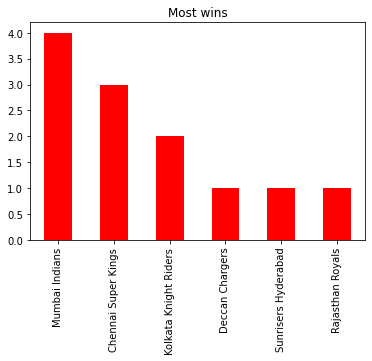

In [60]:
winner_each_season.winner.value_counts().plot(kind='bar',orientation='vertical',title='Most wins',color='red')

# Team winning by maximum runs

In [61]:
matches.iloc[matches['win_by_runs'].idxmax()]['winner']
matches.iloc[matches['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

# Batsman Overview

In [62]:
batsman=deliveries.groupby("batsman").agg({'ball':'count','batsman_runs':'sum'})
batsman.rename(columns={'ball':'balls','batsman_runs':'runs'},inplace=True)
batsman=batsman.sort_values(['balls','runs'],ascending=False)
batsman['batting_strike_rate']=batsman['runs']/batsman['balls']*100
batsman['batting_strike_rate']=batsman['batting_strike_rate'].round(2)
batsman.head(10)


,balls,runs,batting_strike_rate
batsman,,,
V Kohli,4211,5434,129.04
SK Raina,4044,5415,133.90
RG Sharma,3816,4914,128.77
S Dhawan,3776,4632,122.67
G Gambhir,3524,4223,119.84
RV Uthappa,3492,4446,127.32
DA Warner,3398,4741,139.52
MS Dhoni,3318,4477,134.93
AM Rahane,3215,3850,119.75


# Bowlers Overview

In [63]:
bowler_wickets=deliveries.groupby('bowler').agg({'ball':'count','total_runs':'sum','player_dismissed':'count'})
bowler_wickets.columns=['runs','balls','wickets']
Top_bowlers=bowler_wickets.sort_values(['wickets'],ascending=False)[:20]
Top_bowlers

,runs,balls,wickets
bowler,,,
SL Malinga,2974,3511,188
DJ Bravo,2711,3733,168
A Mishra,3172,3850,165
Harbhajan Singh,3451,4050,161
PP Chawla,3157,4153,156
B Kumar,2707,3264,141
R Ashwin,3016,3391,138
SP Narine,2600,2939,137
UT Yadav,2605,3640,136
